In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

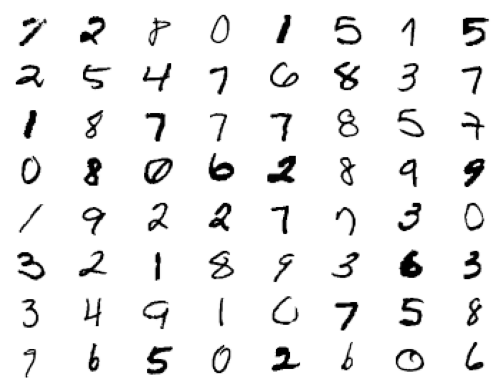

In [4]:
for i in range(64):
    ax = plt.subplot(8,8,i+1)
    ax.axis('off')
    plt.imshow(X_train[randint(0, X_train.shape[0])], cmap = 'Greys')
plt.show()

In [5]:
print("Size of training data: ", X_train.shape)
print("Size of testing data: ",X_test.shape)

Size of training data:  (60000, 28, 28)
Size of testing data:  (10000, 28, 28)


In [6]:
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')

X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')

# Normalization
X_train /= 255
X_test /= 255


In [7]:
# Number of classes
#n_classes = 10

#y_train = np_utils.to_categorical(y_train, n_classes)
#y_test = np_utils.to_categorical(y_test, n_classes)

In [8]:
print("Size of X_train: ", X_train.shape)
print("Size of y_train: ", y_train.shape)

Size of X_train:  (60000, 784)
Size of y_train:  (60000,)


<div class="alert alert-block alert-info">
<b>Note:</b> Instead of using softmax activation function in output layer we use linear and also use loss as *SparseCategoricalCrossentropy* (from_logits = True) to improve numerical roundoff errors (to improve implementation of softmax, or better more numerically accurate implementation of softmax). The point is from_logits = True plus in output layer activation= 'linear'
</div>


In [9]:
model = Sequential([
    Dense(units = 25, activation = 'relu', input_shape = (784,)),
    Dense(units = 15, activation = 'relu'),
    # Dense(units =10, activation = 'softmax')
    Dense(units = 10, activation  = 'linear')
    
])

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
# model.compile(optimizer = Adam(learning_rate =1e-3), loss = SparseCategoricalCrossentropy())
model.compile(optimizer = Adam(learning_rate= 1e-3), loss = SparseCategoricalCrossentropy(from_logits = True))
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


2023-04-04 10:40:18.707414: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 400us/step - loss: 0.3934
Epoch 2/100
1875/1875 [==============================] - 1s 396us/step - loss: 0.2006
Epoch 3/100
1875/1875 [==============================] - 1s 395us/step - loss: 0.1640
Epoch 4/100
1875/1875 [==============================] - 1s 393us/step - loss: 0.1406
Epoch 5/100
1875/1875 [==============================] - 1s 401us/step - loss: 0.1250
Epoch 6/100
1875/1875 [==============================] - 1s 396us/step - loss: 0.1129
Epoch 7/100
1875/1875 [==============================] - 1s 394us/step - loss: 0.1044
Epoch 8/100
1875/1875 [==============================] - 1s 395us/step - loss: 0.0975
Epoch 9/100
1875/1875 [==============================] - 1s 393us/step - loss: 0.0908
Epoch 10/100
1875/1875 [==============================] - 1s 393us/step - loss: 0.0874
Epoch 11/100
1875/1875 [==============================] - 1s 394us/step - loss: 0.0813
Epoch 12/100
1875/1875 [==============================] - 1s 393

1875/1875 [==============================] - 1s 399us/step - loss: 0.0113
Epoch 96/100
1875/1875 [==============================] - 1s 398us/step - loss: 0.0118
Epoch 97/100
1875/1875 [==============================] - 1s 401us/step - loss: 0.0106
Epoch 98/100
1875/1875 [==============================] - 1s 398us/step - loss: 0.0130
Epoch 99/100
1875/1875 [==============================] - 1s 396us/step - loss: 0.0107
Epoch 100/100
1875/1875 [==============================] - 1s 398us/step - loss: 0.0141


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [11]:
import tensorflow as tf
# Predicts
logits = model(X_test)
tf.nn.softmax(logits)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[9.3133320e-19, 1.1243653e-21, 2.9071809e-16, ..., 9.9999988e-01,
        1.6510028e-11, 7.5136647e-08],
       [4.0491457e-23, 6.8170112e-17, 1.0000000e+00, ..., 3.7568132e-21,
        8.7803038e-17, 0.0000000e+00],
       [2.9345095e-08, 9.9336034e-01, 7.5018090e-09, ..., 6.3692198e-08,
        6.4717801e-03, 1.0657721e-09],
       ...,
       [0.0000000e+00, 7.0189724e-21, 2.1124850e-35, ..., 2.0117722e-16,
        8.1852962e-25, 2.5355182e-13],
       [0.0000000e+00, 4.9931287e-30, 0.0000000e+00, ..., 0.0000000e+00,
        1.4382651e-15, 2.2859192e-35],
       [2.6310936e-30, 0.0000000e+00, 8.1948208e-26, ..., 0.0000000e+00,
        2.0833644e-26, 0.0000000e+00]], dtype=float32)>

In [12]:
predictions = np.argmax(logits, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


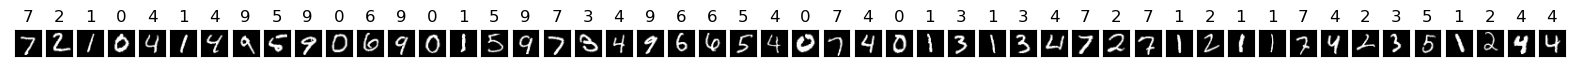

In [13]:
fig, axes = plt.subplots(ncols=50, sharex=False,
                         sharey=True, figsize=(20, 4))
X_test_im = X_test.reshape(10000, 28,28)
for i in range(50):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test_im[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()